<a href="https://colab.research.google.com/github/Jahongir0126/Bazar-shop/blob/main/Word_Cloud_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMDB Dataset.csv to IMDB Dataset.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


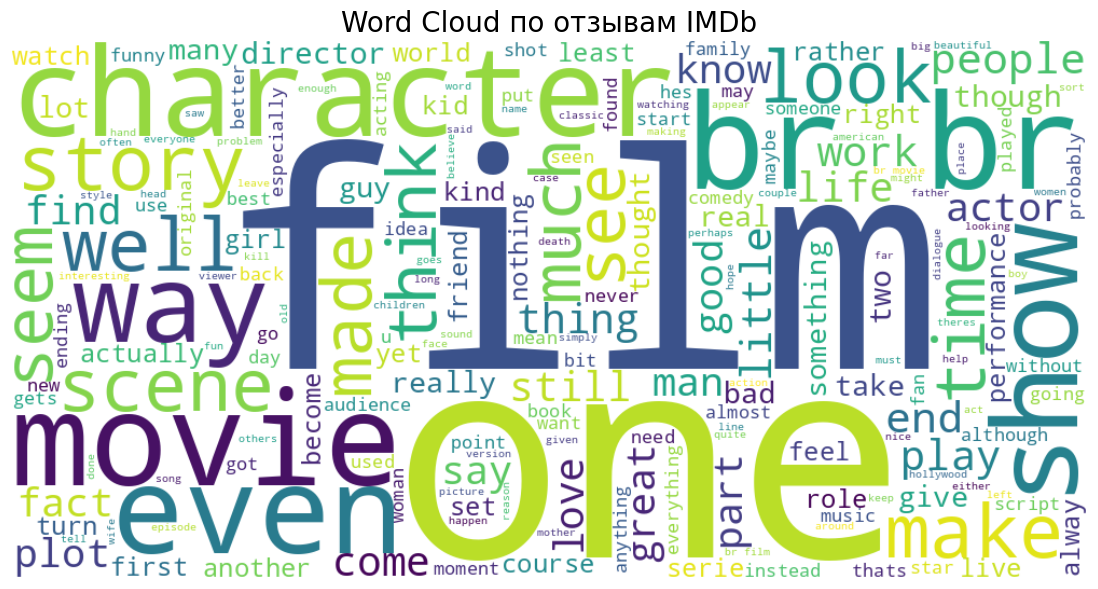

In [7]:
!pip install pandas matplotlib wordcloud nltk

from google.colab import files
uploaded = files.upload()

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv("IMDB Dataset.csv")  # замените имя, если файл называется иначе

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # удаление символов, кроме букв
    words = text.split()
    words = [word for word in words if word not in stop_words]  # удаление стоп-слов
    return " ".join(words)

df["clean_review"] = df["review"].apply(preprocess_text)

all_text = " ".join(df["clean_review"])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud по отзывам IMDb", fontsize=20)
plt.show()
